###Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('/content/Train.csv')
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7133,FDA01,15.00,Regular,0.091018,Canned,60.2904,OUT010,1998,NaN,Tier 3,Grocery Store,117.1808
2299,FDR02,16.70,Low Fat,0.022110,Dairy,110.8886,OUT045,2002,NaN,Tier 2,Supermarket Type1,3558.0352
5486,NCK07,10.65,Low Fat,0.048962,Others,165.8526,OUT017,2007,NaN,Tier 2,Supermarket Type1,3946.8624
700,DRH25,NaN,Low Fat,0.014522,Soft Drinks,50.2324,OUT027,1985,Medium,Tier 3,Supermarket Type3,1298.3100
3115,FDF24,15.50,Regular,0.025474,Baking Goods,83.1934,OUT018,2009,Medium,Tier 3,Supermarket Type2,1146.5076


####EDA

In [4]:
df.shape

(8523, 12)

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
iwm=df['Item_Weight'].mean()
df['Item_Weight'].fillna(iwm,inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
osm=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
osm

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [9]:
mval=df['Outlet_Size'].isnull()

In [10]:
df.loc[mval,'Outlet_Size']=df.loc[mval,'Outlet_Type'].apply(lambda x:osm[x])
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

####Data Visualization

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

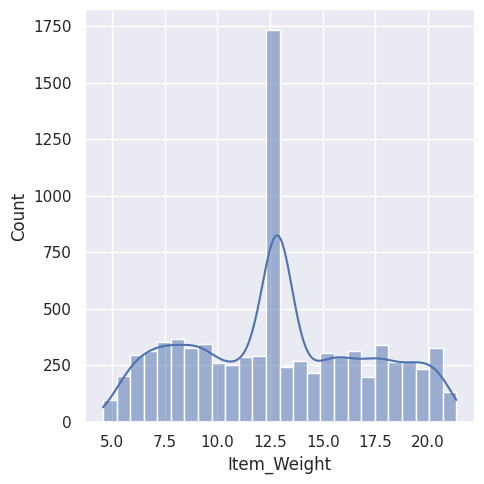

In [12]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'],kde=True)
plt.show()

<Figure size 600x600 with 0 Axes>

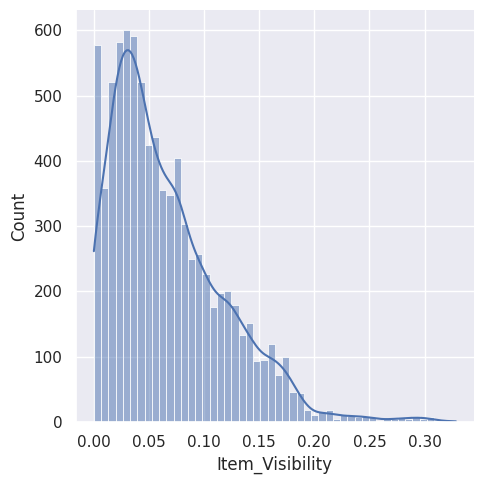

In [13]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'],kde=True)
plt.show()

<Figure size 600x600 with 0 Axes>

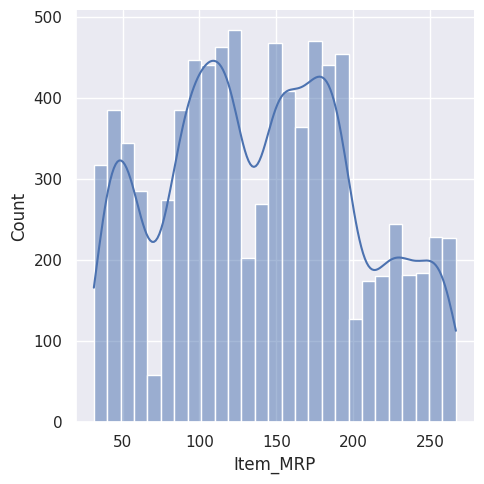

In [14]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'],kde=True)
plt.show()

<Figure size 600x600 with 0 Axes>

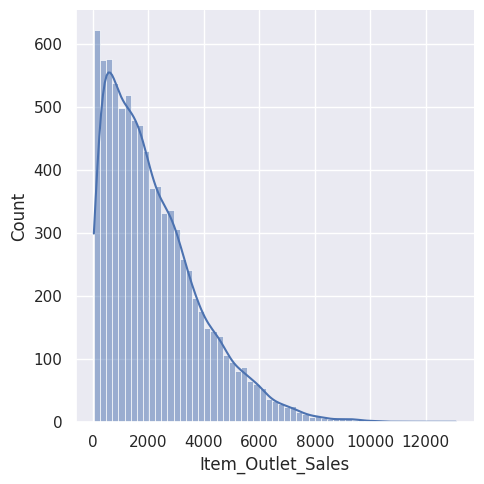

In [15]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'],kde=True)
plt.show()


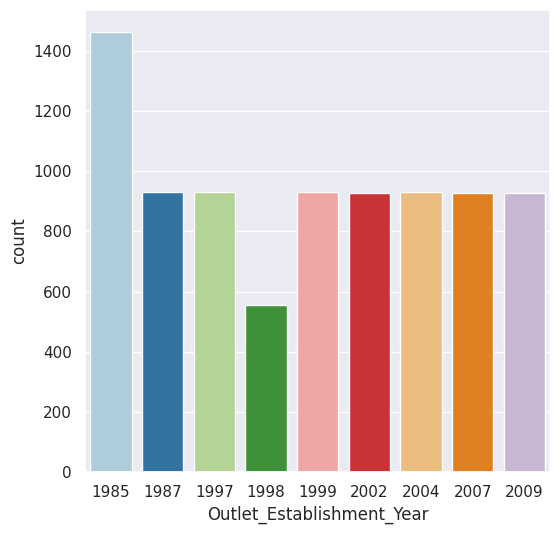

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df,hue='Outlet_Establishment_Year',legend=False,palette='Paired')
plt.show()

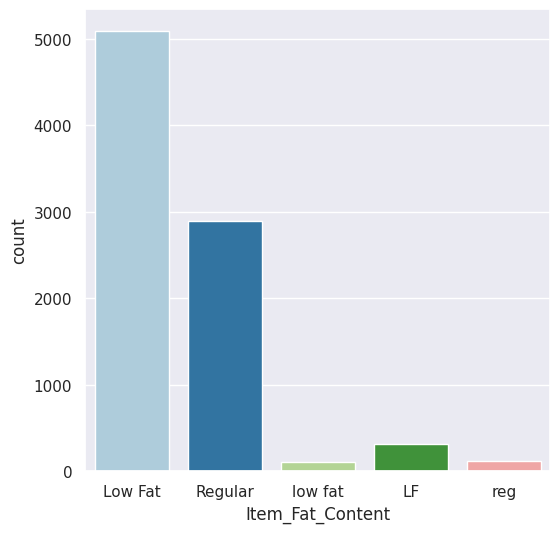

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df,hue='Item_Fat_Content',legend=False,palette='Paired')
plt.show()

cleaning required

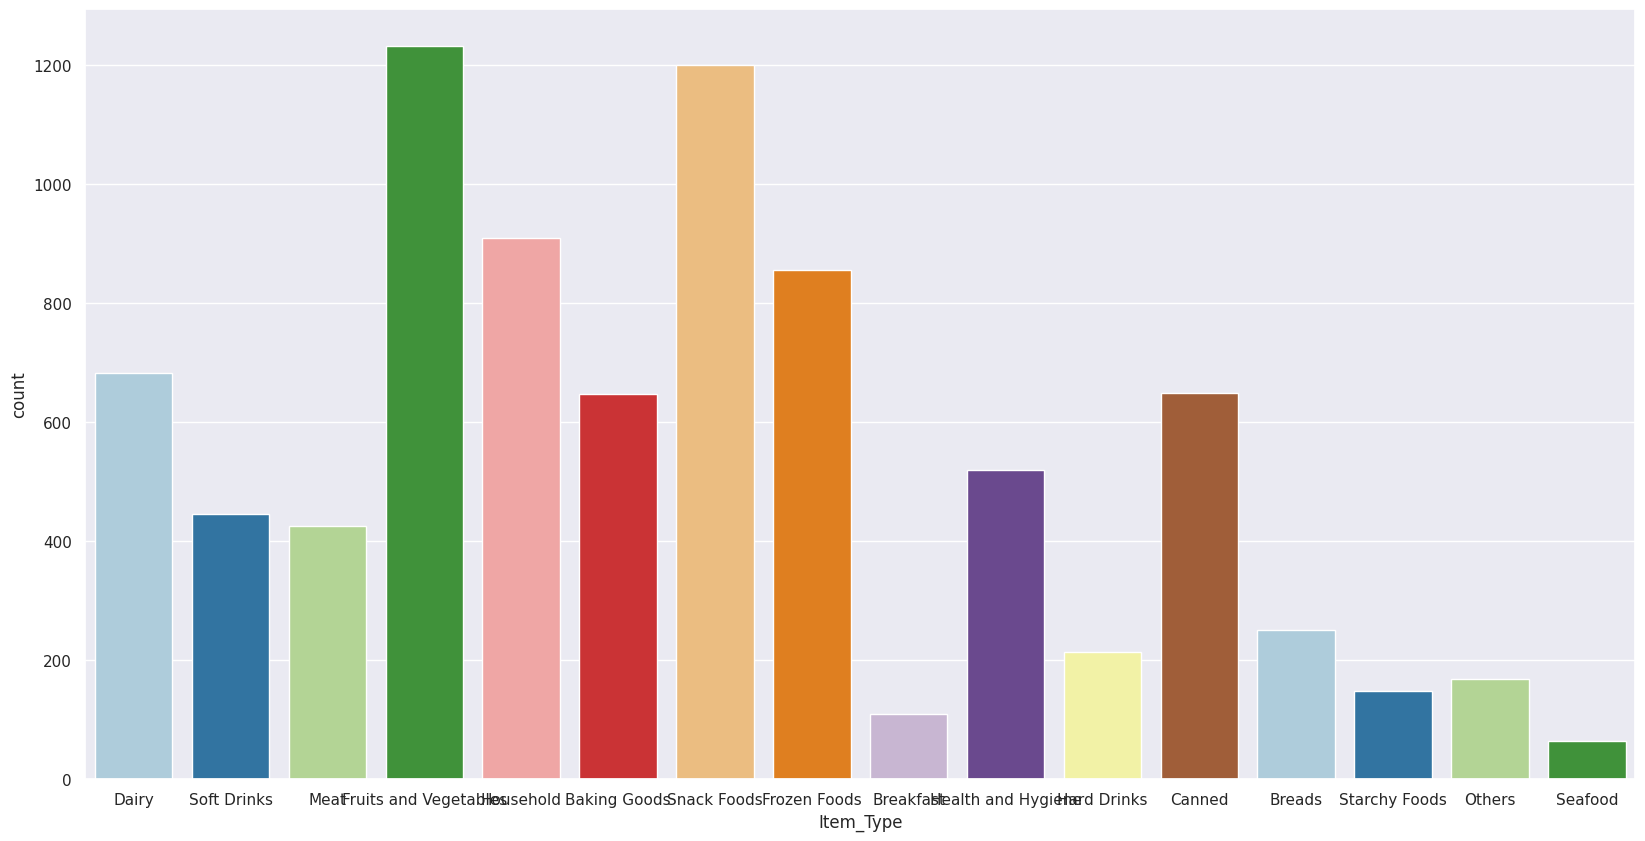

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Item_Type', data=df,hue='Item_Type',legend=False,palette='Paired')
plt.show()

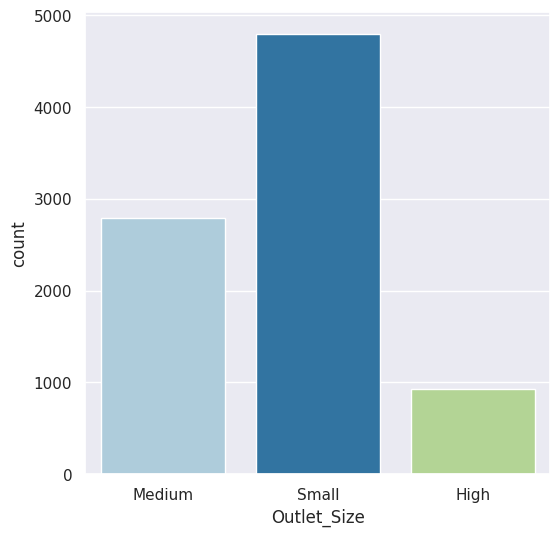

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df,hue='Outlet_Size',legend=False,palette='Paired')
plt.show()

####Data Preprocessing

In [20]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [21]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [22]:
encoder=LabelEncoder()

In [23]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting labels and features

In [24]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [43]:
model= XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
train_pred=model.predict(X_train)
train_acc=metrics.r2_score(Y_train,train_pred)
print('R2 Score:',train_acc)

R2 Score: 0.8867668186007875


In [45]:
test_pred=model.predict(X_test)
test_acc=metrics.r2_score(Y_test,test_pred)
print('R2 Score:',test_acc)

R2 Score: 0.5241073153036377


####Prediction System

In [55]:
data = (1297, 8.93, 0, 0.000000, 9, 53.8614, 1, 1987, 0, 2, 1)
asnparr = np.asarray(data)
reshaped = asnparr.reshape(1, -1)

columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
           'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
           'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

df_input = pd.DataFrame(reshaped, columns=columns)

prediction = model.predict(df_input)

print(f'The estimated sales is: ${prediction[0]:.2f}')

The estimated sales is: $744.16
